In [2]:
import numpy as np
import matplotlib.pyplot as plt

#SIGMOID:
#YES: binary classification in the output layer (a. Natural Probability (0,1), b. Natural threshold)
#Sensitive around 'x=0'
#Smooth derivative & helps GD
#YES: Multi-label classification (sum(o/p) is not 1)
#NO: hidden layers because of the vanishing gradient problem (Near 1/0)
#Not zero-centered. Activation is always +ve. So Zig-zag learning

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

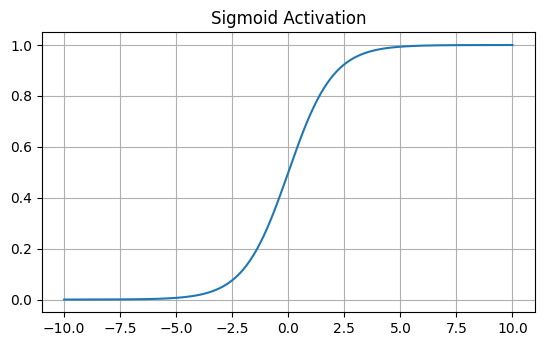

In [ ]:
# Generate data
x = np.linspace(-10, 10, 400)

# Plotting
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation')
plt.grid()

In [ ]:
#TANH:
#YES: Regression, bipolar data, (RNN, GAN, Autoencoder)
#Sensitive around 'x=0'
#Zero-centered. Steeper change in activation. So Zig-zag learning
#Smooth derivative & helps GD
#NO: hidden layers because of the vanishing gradient problem (Near -1/+1)
#NO: Binary classification (Range -1,1) & Binary cross-entropy loss tunes for (0,1)

def tanh(x):
    return np.tanh(x)

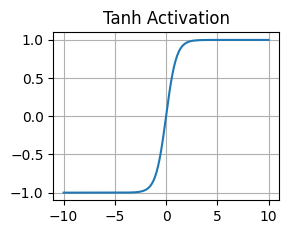

In [ ]:
plt.subplot(2, 2, 2)
plt.plot(x, tanh(x))
plt.title('Tanh Activation')
plt.grid()

In [ ]:
#RELU:
#YES: hidden layers - No vanishing gradient problem
#Simple math. Fast. leads to sparsity (eliminates -ve & '0')
#Derivative 0 or 1.
#NO: Not at the output layer
#Non-zero centered
#"dying ReLU" problem: Activation is always +ve. Training may get stuck.
#Activations grow without limit

def relu(x):
    return np.maximum(0, x)

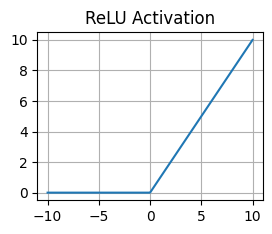

In [ ]:
plt.subplot(2, 2, 3)
plt.plot(x, relu(x))
plt.title('ReLU Activation')
plt.grid()

In [ ]:
#LEAKY_RELU: (Use if Relu is not enough)
#YES: DEEPER hidden layers - No vanishing gradient problem
#Simple math. Fast. Keeps small -ve value.
#Eliminates "dying ReLU"
#NO: Not at the output layer
#Non-zero centered
#alpha= ~0.01 to 0.3 (Sometimes impacts training)
#Activations grow without limit

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

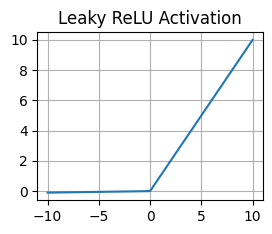

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU Activation')
plt.grid()


In [ ]:
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, tanh(x))
plt.title('Tanh Activation')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(x, relu(x))
plt.title('ReLU Activation')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU Activation')
plt.grid()

plt.tight_layout()
plt.show()

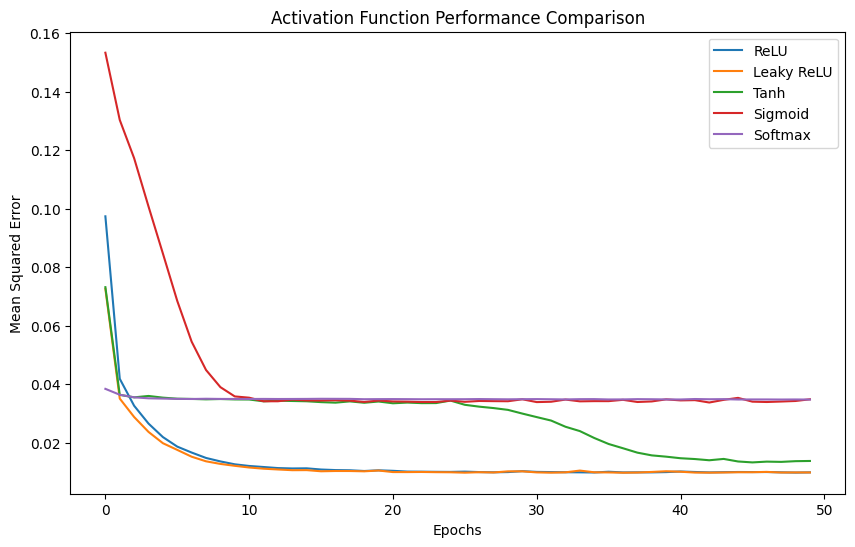

In [3]:
#Understand reasons for the performance (Regression - continuous)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

# 1. Generate a simple 1D dataset
X = np.linspace(-1, 1, 1000)
y = X**3 + 0.1 * np.random.randn(1000)  # cubic function with some noise

# 2. Neural Network Models
def build_model(activation_function):
    model = Sequential()

    if activation_function == "leaky_relu":
        model.add(Dense(32, input_dim=1))
        model.add(LeakyReLU(alpha=0.01))
    elif activation_function == "softmax":
        model.add(Dense(2, input_dim=1, activation=activation_function))  # 2 outputs for softmax
        model.add(Dense(1))
        model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
        return model
    else:
        model.add(Dense(32, input_dim=1, activation=activation_function))

    model.add(Dense(32, activation=activation_function))
    model.add(Dense(1))

    model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
    return model

relu_model = build_model("relu")
leaky_relu_model = build_model("leaky_relu")
tanh_model = build_model("tanh")
sigmoid_model = build_model("sigmoid")
softmax_model = build_model("softmax")

# 3. Training
relu_history = relu_model.fit(X, y, epochs=50, verbose=0)
leaky_relu_history = leaky_relu_model.fit(X, y, epochs=50, verbose=0)
tanh_history = tanh_model.fit(X, y, epochs=50, verbose=0)
sigmoid_history = sigmoid_model.fit(X, y, epochs=50, verbose=0)
softmax_history = softmax_model.fit(X, y, epochs=50, verbose=0)

# 4. Performance Comparison
plt.figure(figsize=(10, 6))
plt.plot(relu_history.history['loss'], label="ReLU")
plt.plot(leaky_relu_history.history['loss'], label="Leaky ReLU")
plt.plot(tanh_history.history['loss'], label="Tanh")
plt.plot(sigmoid_history.history['loss'], label="Sigmoid")
plt.plot(softmax_history.history['loss'], label="Softmax")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Activation Function Performance Comparison")
plt.show()


In [4]:
relu_history = relu_model.fit(X, y, epochs=50, verbose=0)
leaky_relu_history = leaky_relu_model.fit(X, y, epochs=50, verbose=0)
tanh_history = tanh_model.fit(X, y, epochs=50, verbose=0)
sigmoid_history = sigmoid_model.fit(X, y, epochs=50, verbose=0)

# Save weights for each model
relu_weights = relu_model.get_weights()
leaky_relu_weights = leaky_relu_model.get_weights()
tanh_weights = tanh_model.get_weights()
sigmoid_weights = sigmoid_model.get_weights()

# Print range of weights for each model
def print_weight_ranges(weights, model_name):
    print(f"Weights range for {model_name}:")
    for i, layer_weights in enumerate(weights):
        print(f"Layer {i + 1}: Min: {np.min(layer_weights)}, Max: {np.max(layer_weights)}")
    print("\n")

print_weight_ranges(relu_weights, "ReLU")
print_weight_ranges(leaky_relu_weights, "Leaky ReLU")
print_weight_ranges(tanh_weights, "Tanh")
print_weight_ranges(sigmoid_weights, "Sigmoid")


Weights range for ReLU:
Layer 1: Min: -0.45897144079208374, Max: 0.42112183570861816
Layer 2: Min: -0.20132195949554443, Max: 0.23661832511425018
Layer 3: Min: -0.5736712217330933, Max: 0.5660163760185242
Layer 4: Min: -0.22520451247692108, Max: 0.1880367398262024
Layer 5: Min: -0.7104538083076477, Max: 0.5081000328063965
Layer 6: Min: 0.02592860721051693, Max: 0.02592860721051693


Weights range for Leaky ReLU:
Layer 1: Min: -0.43917569518089294, Max: 0.45332035422325134
Layer 2: Min: -0.18765094876289368, Max: 0.15265697240829468
Layer 3: Min: -0.5596723556518555, Max: 0.7246370315551758
Layer 4: Min: -0.08470652252435684, Max: 0.07484537363052368
Layer 5: Min: -0.6014474034309387, Max: 0.5983439087867737
Layer 6: Min: 0.014581086114048958, Max: 0.014581086114048958


Weights range for Tanh:
Layer 1: Min: -0.38894590735435486, Max: 0.8118510842323303
Layer 2: Min: -0.018022404983639717, Max: 0.0060573602095246315
Layer 3: Min: -0.4773547351360321, Max: 0.5341206789016724
Layer 4: Min

In [5]:
def print_layer_weights(model, model_name):
    print(f"Weights for {model_name}:")

    for i, layer in enumerate(model.layers):
        weights = layer.get_weights()

        if len(weights) > 0:  # Check if the layer has weights (e.g., Dense layers)
            W = weights[0]
            b = weights[1]

            print(f"\nLayer {i + 1}:")
            print("Weights:")
            print(W)
            print("Biases:")
            print(b)
        else:
            print(f"\nLayer {i + 1} has no weights.")

    print("\n\n")

print_layer_weights(relu_model, "ReLU")
print_layer_weights(leaky_relu_model, "Leaky ReLU")
print_layer_weights(tanh_model, "Tanh")
print_layer_weights(sigmoid_model, "Sigmoid")
print_layer_weights(softmax_model, "Softmax")


Weights for ReLU:

Layer 1:
Weights:
[[-0.4136449  -0.27004585 -0.3754577   0.28367984  0.32487416  0.36280274
   0.42112184 -0.06460433 -0.06670675  0.27061087 -0.07559539 -0.00430409
  -0.13706078 -0.17385647 -0.27148867 -0.37258312 -0.32831827 -0.28415388
  -0.14496067 -0.357045   -0.00482182 -0.45897144  0.352854   -0.09993363
  -0.19714092 -0.31417376 -0.06869113  0.31134072  0.36460268  0.18040062
   0.28259727 -0.42664438]]
Biases:
[-0.1832903   0.09241255 -0.07128376 -0.17573847 -0.1554978  -0.08854731
 -0.20132196  0.0393979  -0.00877515  0.03569937  0.06336929 -0.00682972
 -0.10988987 -0.01433073 -0.12625836 -0.06926318 -0.0304732  -0.08214946
 -0.11399178 -0.09207103 -0.0184639  -0.08574992 -0.03781866  0.04626032
 -0.03716627 -0.06633172  0.23661833 -0.06893199 -0.0275874  -0.13938664
 -0.10305436 -0.1772459 ]

Layer 2:
Weights:
[[ 0.19211845  0.01310432 -0.045155   ... -0.08035456  0.0414168
   0.1668224 ]
 [ 0.08958527  0.03545617 -0.1633221  ...  0.36000276 -0.27288818
 